## Stock Price Prediction using LSTM

es.

## This project demonstrates how to predict Google stock prices using an LSTM (Long Short-Term Memory) neural network. 

## The model is trained on historical stock data and then used to forecast future prices.

### 1. Import  necessary libraries for data manipulation, visualization, and machine learning.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

### Load the training and testing datasets

In [166]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [168]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [170]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


## Data Overview

In [173]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [175]:
df_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [177]:
df_train.isnull().sum() 

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Data Visualization

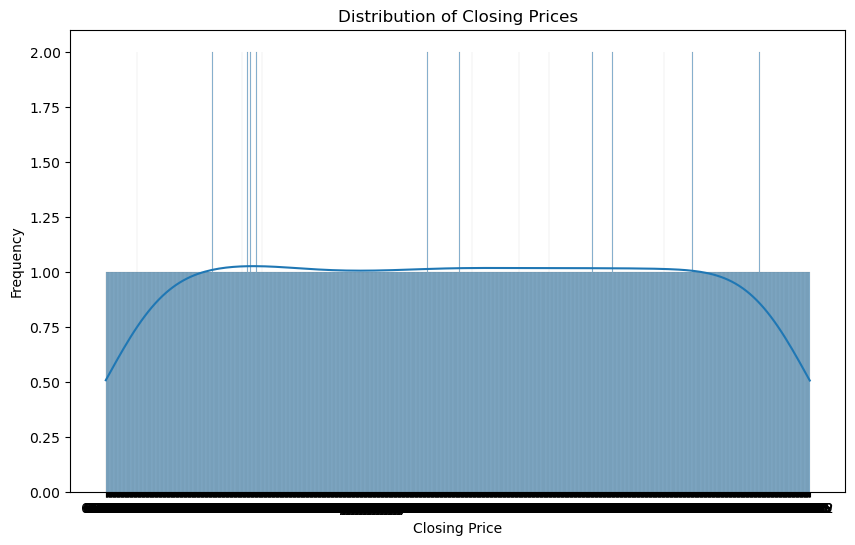

In [180]:
# Distribution of Closing Prices
plt.figure(figsize=(10, 6))  
sns.histplot(df_train['Close'], kde=True)  
plt.title('Distribution of Closing Prices')  
plt.xlabel('Closing Price')  
plt.ylabel('Frequency')  
plt.show() 

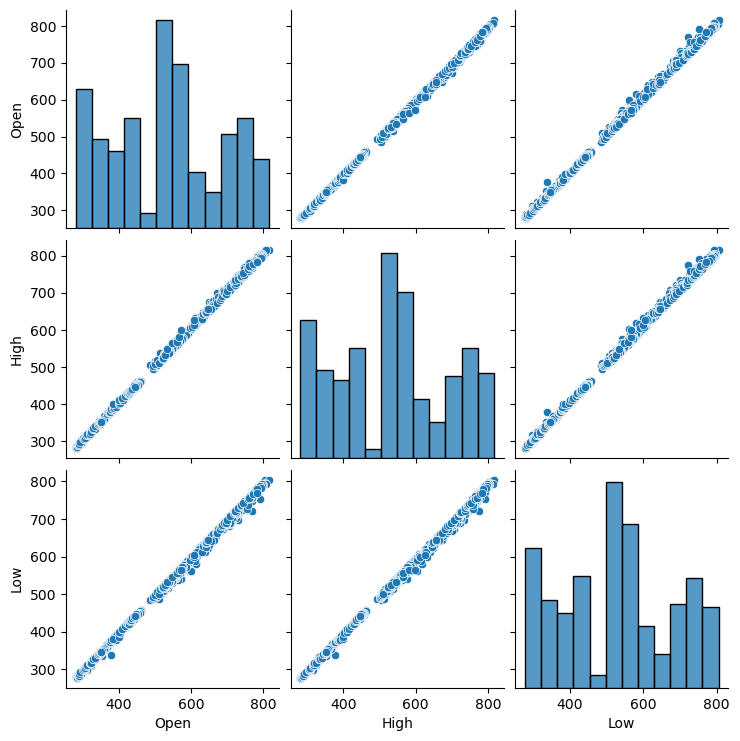

In [181]:
# Pairplot of Numerical Columns
sns.pairplot(df_train[['Open', 'High', 'Low', 'Close', 'Volume']])  
plt.show()

##  Data Preprocessing

In [183]:
# Converting the 'Close' column to string type, remove commas, and convert to float.
df_train['Close'] = df_train['Close'].astype(str).str.replace(',', '').astype(float)
df_test['Close'] = df_test['Close'].astype(str).str.replace(',', '').astype(float)

In [184]:
# Extracting the target variable, which is the 'Close' price.
target_var = df_train[['Close']].values 

### MinMax Scaling

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
# Scaling helps improve model performance and convergence speed.
scaler = MinMaxScaler(feature_range=(0, 1))  
training_set_scaled = scaler.fit_transform(target_var)  

### Preparing the training dataset by creating input-output pairs.

In [189]:
# Using a lookback period of 60 days, meaning the model will use the previous 60 days' data to predict the next day's price.
X_train = []  # Input features (past 60 days' prices)
y_train = []  # Output (current day's price)
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  # Convert to NumPy arrays
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM input

## Build LSTM Model

In [191]:
from keras.models import Sequential  # For building the neural network model
from keras.layers import LSTM, Dense  # For adding layers to the neural network

In [192]:
# The model consists of two LSTM layers followed by a Dense output layer.
model = Sequential()  
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(LSTM(units=50))  # Second LSTM layer
model.add(Dense(units=1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model with Adam optimizer and MSE loss

### Train LSTM Model

In [194]:
# The model is trained for a specified number of epochs (iterations) and batch size.
model.fit(X_train, y_train, epochs=100, batch_size=32)  

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0640
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0048
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0029
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - loss: 0.0018
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0019
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0022
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0027
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0021
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0017
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - l

###  Preparing the Test Data to Make Predictions

In [196]:
dataset_total = pd.concat((df_train['Close'], df_test['Close']), axis=0)  

In [197]:
# Extract input data for prediction (last 60 days of training + test data).
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values  

In [198]:
# Reshape input data for scaling.
inputs = inputs.reshape(-1, 1)  

# Scale input data using the training data scaler.
inputs = scaler.transform(inputs)

In [199]:
# Creating test dataset (X_test) with 60-day lookback.
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [200]:
# Reshape X_test for LSTM input.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the trained model.
predicted_stock_price = model.predict(X_test)

# Inverse transform predictions to get actual stock prices.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


## Model Evaluation

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

In [203]:
# Calculate Root Mean Squared Error (RMSE).
rmse = np.sqrt(mean_squared_error(df_test['Close'], predicted_stock_price))

# Calculate R-squared.
r2 = r2_score(df_test['Close'], predicted_stock_price)
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 11.574415498275252
R-squared: 0.1919037194936144


## Plot of actual vs. predicted stock prices.

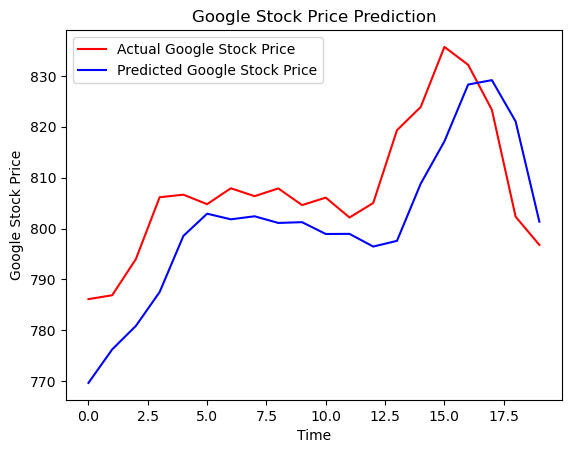

In [205]:
plt.plot(df_test['Close'].values, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()